In [40]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

In [2]:
import requests
from io import StringIO

In [3]:
poll_df = pd.read_excel(r'C:\Users\DR.SAGNIK\.ipynb_checkpoints\poll_data.xlsx', sheet_name='Data')

In [4]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10919 entries, 0 to 10918
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   poll_id                    10919 non-null  int64         
 1   pollster_id                10919 non-null  int64         
 2   pollster                   10919 non-null  object        
 3   sponsor_ids                10919 non-null  object        
 4   sponsors                   5135 non-null   object        
 5   display_name               10919 non-null  object        
 6   pollster_rating_id         10919 non-null  int64         
 7   pollster_rating_name       10919 non-null  object        
 8   numeric_grade              9595 non-null   float64       
 9   pollscore                  9595 non-null   float64       
 10  methodology                10537 non-null  object        
 11  transparency_score         7710 non-null   float64       
 12  stat

In [5]:
poll_df.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,87541,1709,Big Village,,NaN,Big Village,37,Big Village,1.6,0.3,...,2024-11-05,general,False,False,NaN,DEM,Harris,16661,Kamala Harris,37.6
1,87541,1709,Big Village,,NaN,Big Village,37,Big Village,1.6,0.3,...,2024-11-05,general,False,False,NaN,REP,Trump,16651,Donald Trump,38.2
2,87541,1709,Big Village,,NaN,Big Village,37,Big Village,1.6,0.3,...,2024-11-05,general,False,False,NaN,IND,Kennedy,31042,Robert F. Kennedy,6.7
3,87541,1709,Big Village,,NaN,Big Village,37,Big Village,1.6,0.3,...,2024-11-05,general,False,False,NaN,IND,West,31097,Cornel West,1.2
4,87541,1709,Big Village,,NaN,Big Village,37,Big Village,1.6,0.3,...,2024-11-05,general,False,False,NaN,GRE,Stein,31116,Jill Stein,1.4


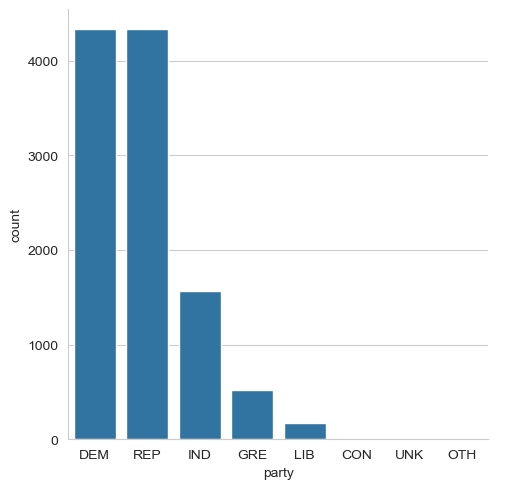

In [6]:
sns.catplot(x='party',kind='count',data=poll_df);
plt.show()

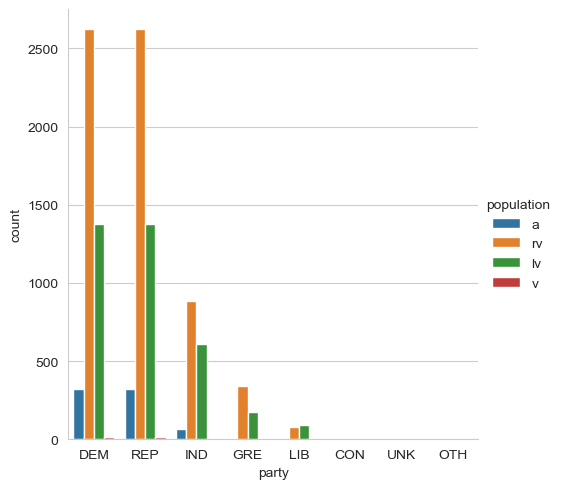

In [7]:
sns.catplot(x='party',kind='count',data=poll_df,hue='population')
plt.show()

In [8]:
avg = poll_df.mean(numeric_only=True)
std = poll_df.std(numeric_only=True)

poll_avg = pd.concat([avg, std], axis=1)
poll_avg.columns = ['Average', 'STD']
poll_avg

,Average,STD
poll_id,84958.989102,2525.727396
pollster_id,1208.618372,491.984733
pollster_rating_id,332.343346,215.744236
numeric_grade,2.164450,0.635730
pollscore,-0.393174,0.662177
transparency_score,6.179896,2.455915
sponsor_candidate_id,28599.965870,5430.345116
endorsed_candidate_id,NaN,NaN
endorsed_candidate_name,NaN,NaN
endorsed_candidate_party,NaN,NaN


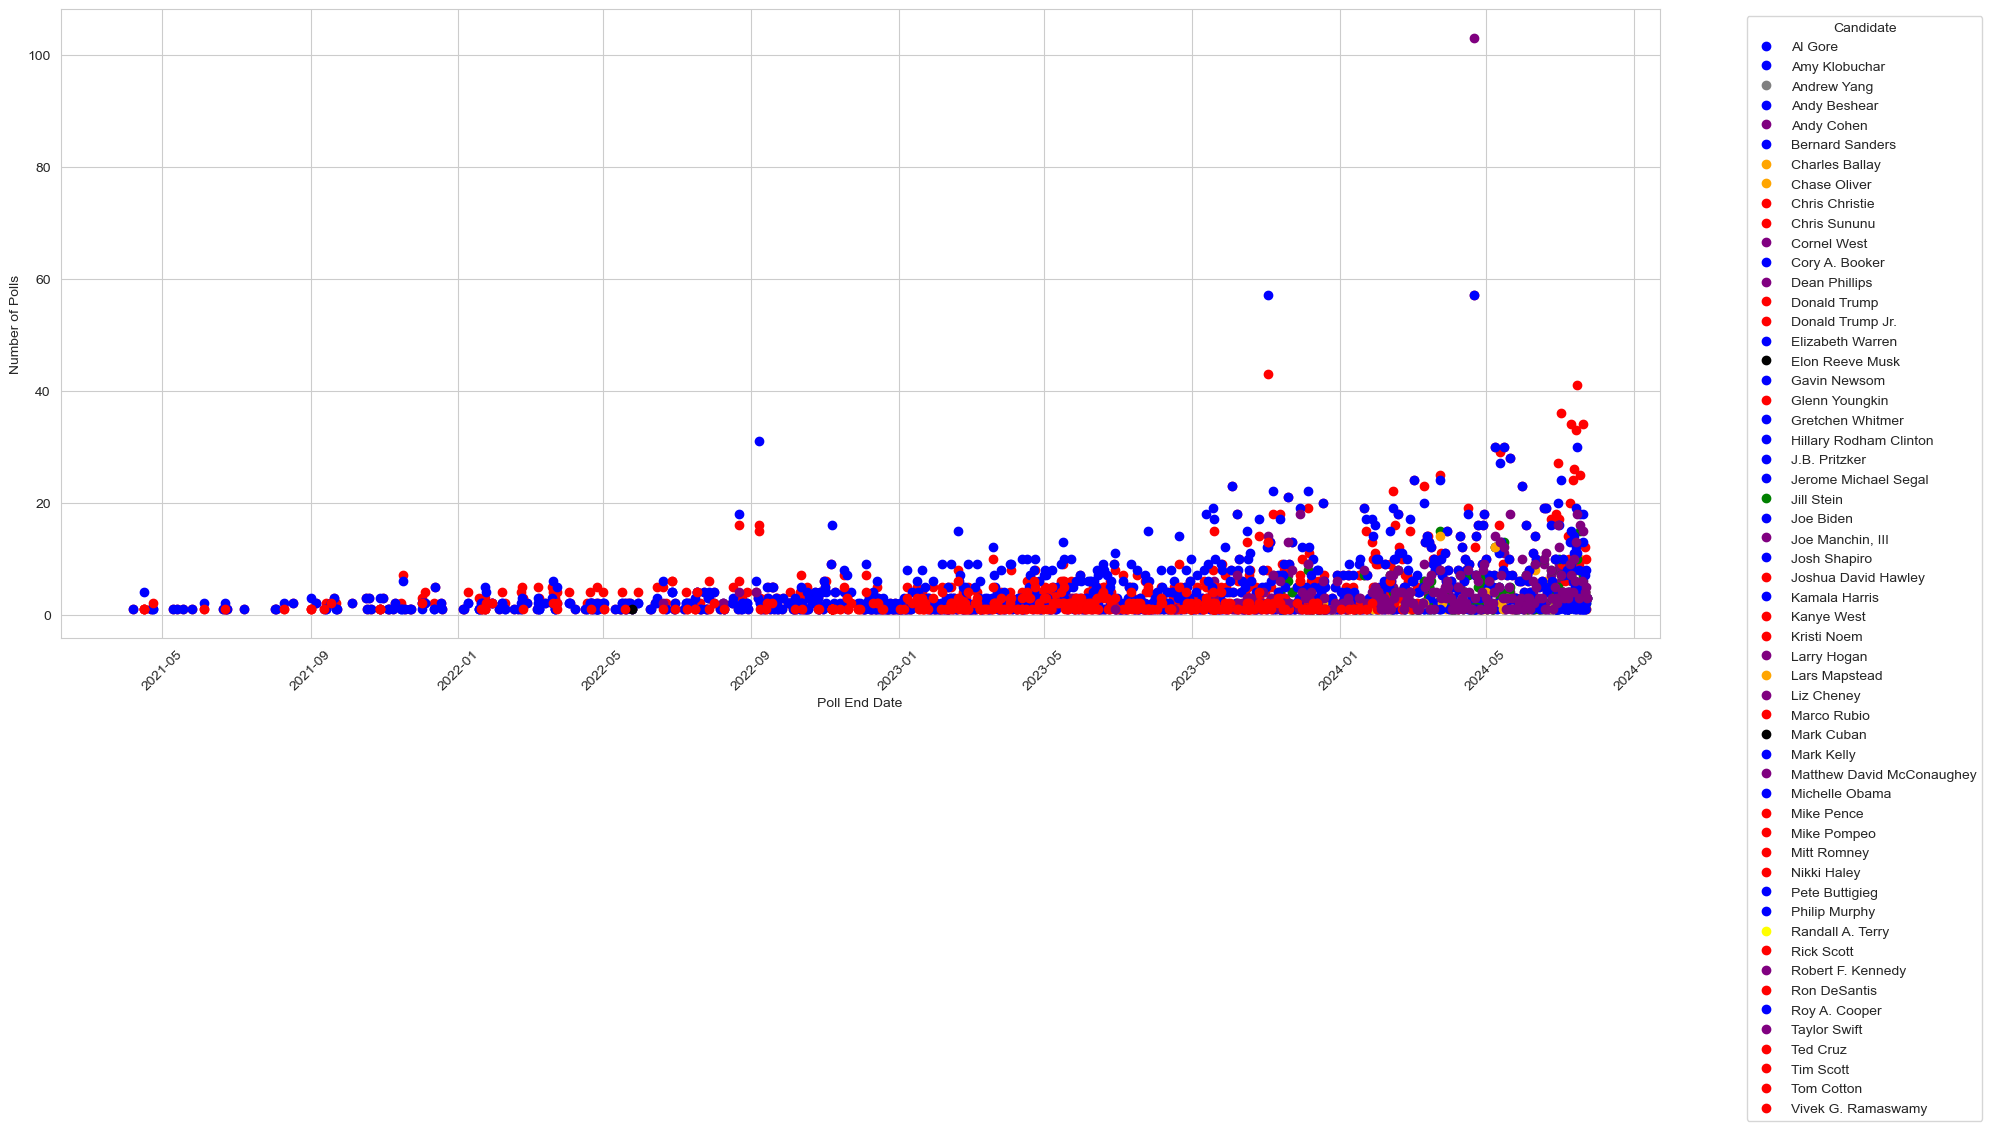

In [9]:
party_colors = {
    'Democratic': 'blue',
    'Republican': 'red',
    'Independent': 'purple',
    'Libertarian': 'orange',
    'Green': 'green',
    'Other': 'gray',
    'Unknown': 'black',
    'Constitution': 'yellow'
}


candidate_party_map = {
    'Al Gore': 'Democratic',
    'Amy Klobuchar': 'Democratic',
    'Andrew Yang': 'Other',
    'Andy Beshear': 'Democratic',
    'Andy Cohen': 'Independent',
    'Bernard Sanders': 'Democratic',
    'Charles Ballay': 'Libertarian',
    'Chase Oliver': 'Libertarian',
    'Chris Christie': 'Republican',
    'Chris Sununu': 'Republican',
    'Cornel West': 'Independent',
    'Cory A. Booker': 'Democratic',
    'Dean Phillips': 'Independent',
    'Donald Trump': 'Republican',
    'Donald Trump Jr.': 'Republican',
    'Elizabeth Warren': 'Democratic',
    'Elon Reeve Musk': 'Unknown',
    'Gavin Newsom': 'Democratic',
    'Glenn Youngkin': 'Republican',
    'Gretchen Whitmer': 'Democratic',
    'Hillary Rodham Clinton': 'Democratic',
    'J.B. Pritzker': 'Democratic',
    'Jerome Michael Segal': 'Democratic',
    'Jill Stein': 'Green',
    'Joe Biden': 'Democratic',
    'Joe Manchin, III': 'Independent',
    'Josh Shapiro': 'Democratic',
    'Joshua David Hawley': 'Republican',
    'Kamala Harris': 'Democratic',
    'Kanye West':'Republican',
    'Kristi Noem': 'Republican',
    'Larry Hogan': 'Independent',
    'Lars Mapstead': 'Libertarian',
    'Liz Cheney': 'Independent',
    'Marco Rubio': 'Republican',
    'Mark Cuban': 'Unknown',
    'Mark Kelly': 'Democratic',
    'Matthew David McConaughey': 'Independent',
    'Michelle Obama': 'Democratic',
    'Mike Pence': 'Republican',
    'Mike Pompeo': 'Republican',
    'Mitt Romney': 'Republican',
    'Nikki Haley': 'Republican',
    'Pete Buttigieg': 'Democratic',
    'Philip Murphy': 'Democratic',
    'Randall A. Terry': 'Constitution',
    'Rick Scott': 'Republican',
    'Robert F. Kennedy': 'Independent',
    'Ron DeSantis': 'Republican',
    'Roy A. Cooper': 'Democratic',
    'Taylor Swift': 'Independent',
    'Ted Cruz': 'Republican',
    'Tim Scott': 'Republican',
    'Tom Cotton': 'Republican',
    'Vivek G. Ramaswamy': 'Republican'
    
}

poll_counts = poll_df.groupby(['candidate_name', 'end_date']).size().reset_index(name='poll_count')

poll_counts['party'] = poll_counts['candidate_name'].map(candidate_party_map)
poll_counts['color'] = poll_counts['party'].map(party_colors).fillna('gray')

plt.figure(figsize=(20, 10))

for candidate, data in poll_counts.groupby('candidate_name'):
    plt.plot(data['end_date'], data['poll_count'], 
             marker='o', linestyle='', 
             label=candidate,
             color=data['color'].iloc[0])

plt.xlabel("Poll End Date")
plt.ylabel("Number of Polls")
plt.xticks(rotation=45)
plt.legend(title='Candidate', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()


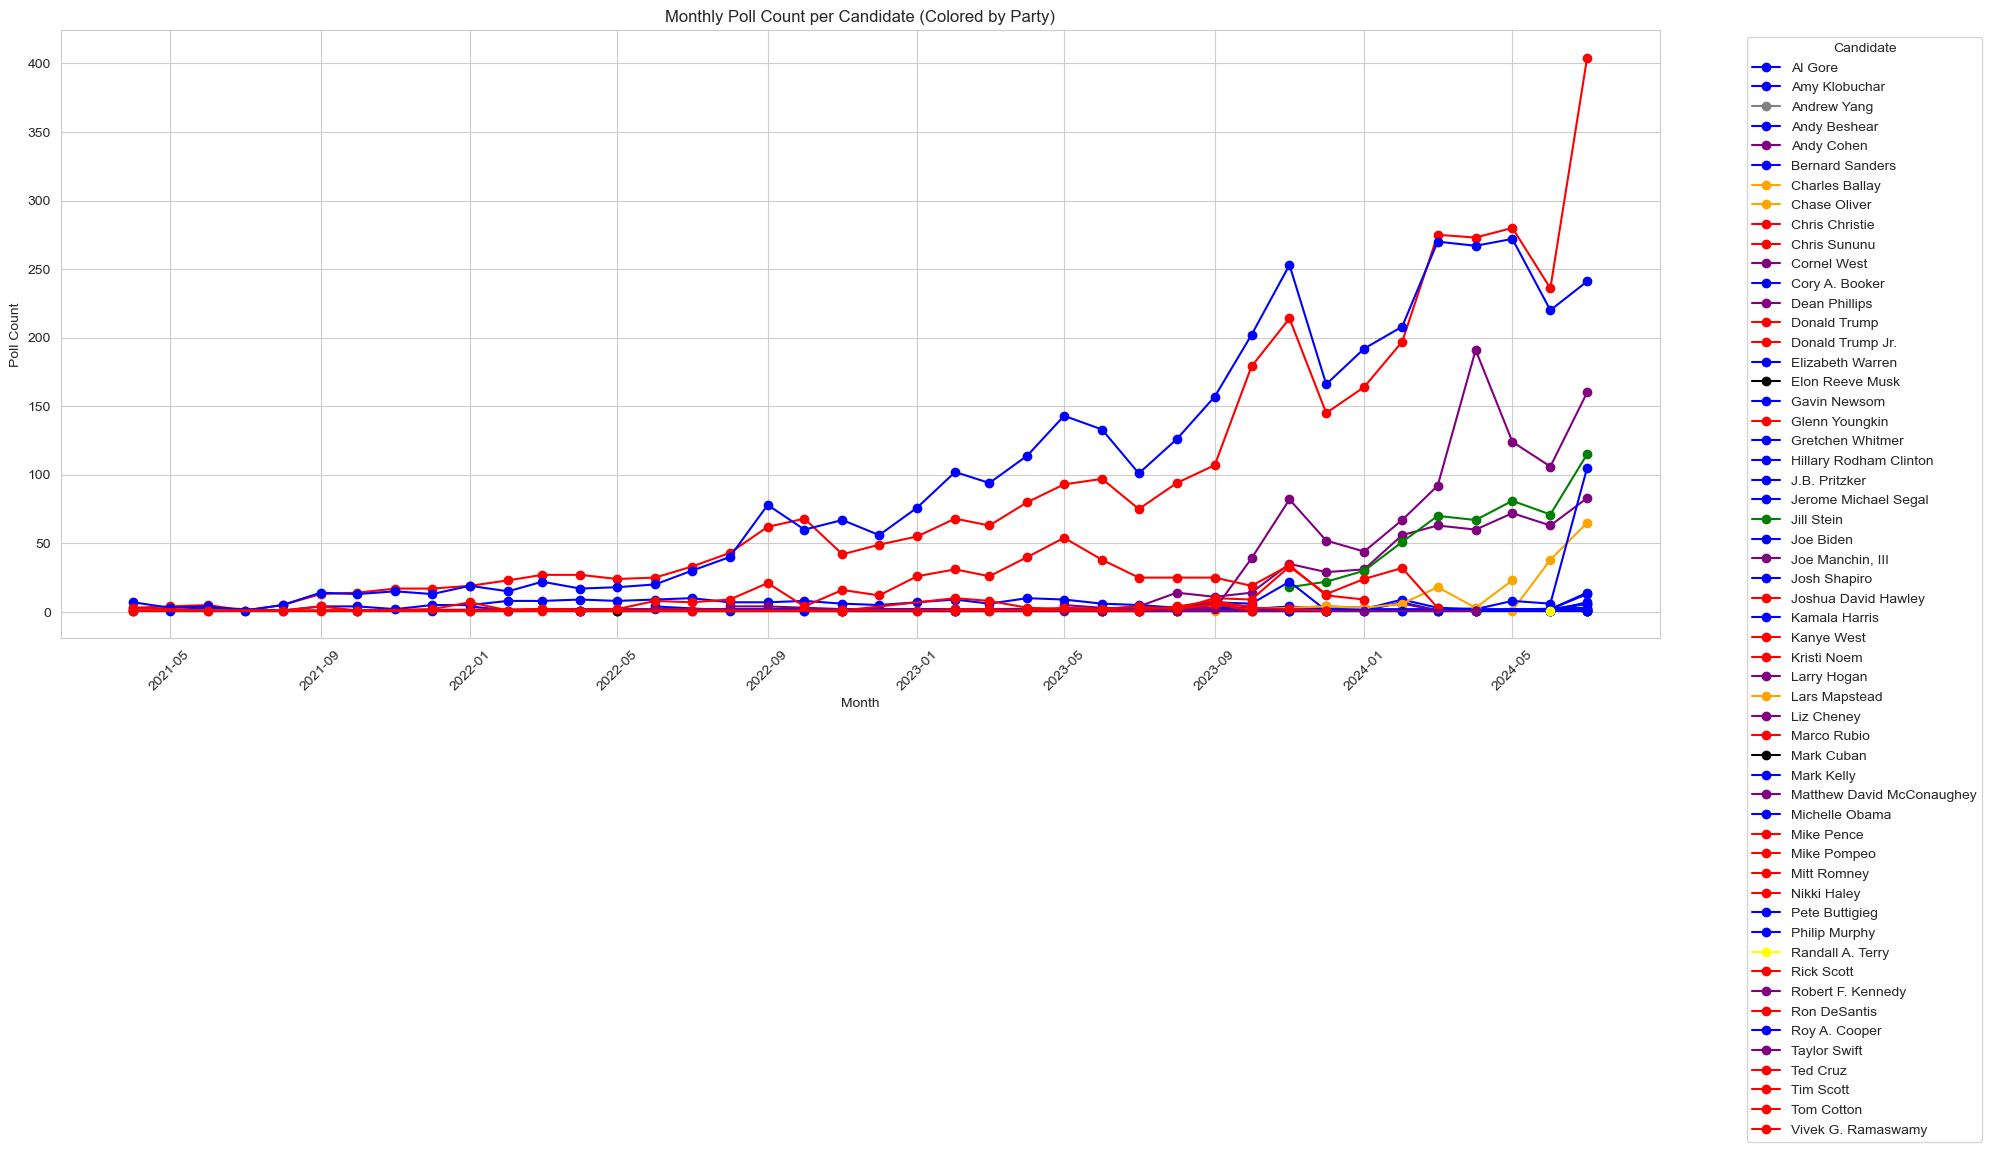

In [10]:
party_colors = {
    'Democratic': 'blue',
    'Republican': 'red',
    'Independent': 'purple',
    'Libertarian': 'orange',
    'Green': 'green',
    'Other': 'gray',
    'Unknown': 'black',
    'Constitution': 'yellow'
}


candidate_party_map = {
    'Al Gore': 'Democratic',
    'Amy Klobuchar': 'Democratic',
    'Andrew Yang': 'Other',
    'Andy Beshear': 'Democratic',
    'Andy Cohen': 'Independent',
    'Bernard Sanders': 'Democratic',
    'Charles Ballay': 'Libertarian',
    'Chase Oliver': 'Libertarian',
    'Chris Christie': 'Republican',
    'Chris Sununu': 'Republican',
    'Cornel West': 'Independent',
    'Cory A. Booker': 'Democratic',
    'Dean Phillips': 'Independent',
    'Donald Trump': 'Republican',
    'Donald Trump Jr.': 'Republican',
    'Elizabeth Warren': 'Democratic',
    'Elon Reeve Musk': 'Unknown',
    'Gavin Newsom': 'Democratic',
    'Glenn Youngkin': 'Republican',
    'Gretchen Whitmer': 'Democratic',
    'Hillary Rodham Clinton': 'Democratic',
    'J.B. Pritzker': 'Democratic',
    'Jerome Michael Segal': 'Democratic',
    'Jill Stein': 'Green',
    'Joe Biden': 'Democratic',
    'Joe Manchin, III': 'Independent',
    'Josh Shapiro': 'Democratic',
    'Joshua David Hawley': 'Republican',
    'Kamala Harris': 'Democratic',
    'Kanye West':'Republican',
    'Kristi Noem': 'Republican',
    'Larry Hogan': 'Independent',
    'Lars Mapstead': 'Libertarian',
    'Liz Cheney': 'Independent',
    'Marco Rubio': 'Republican',
    'Mark Cuban': 'Unknown',
    'Mark Kelly': 'Democratic',
    'Matthew David McConaughey': 'Independent',
    'Michelle Obama': 'Democratic',
    'Mike Pence': 'Republican',
    'Mike Pompeo': 'Republican',
    'Mitt Romney': 'Republican',
    'Nikki Haley': 'Republican',
    'Pete Buttigieg': 'Democratic',
    'Philip Murphy': 'Democratic',
    'Randall A. Terry': 'Constitution',
    'Rick Scott': 'Republican',
    'Robert F. Kennedy': 'Independent',
    'Ron DeSantis': 'Republican',
    'Roy A. Cooper': 'Democratic',
    'Taylor Swift': 'Independent',
    'Ted Cruz': 'Republican',
    'Tim Scott': 'Republican',
    'Tom Cotton': 'Republican',
    'Vivek G. Ramaswamy': 'Republican'
    
}

poll_counts = poll_counts.drop_duplicates()

poll_counts['end_month'] = poll_counts['end_date'].dt.to_period('M').dt.to_timestamp()
monthly_counts = poll_counts.groupby(['candidate_name', 'end_month'])['poll_count'].sum().reset_index()

monthly_counts['party'] = monthly_counts['candidate_name'].map(candidate_party_map)
monthly_counts['color'] = monthly_counts['party'].map(party_colors).fillna('gray')

plt.figure(figsize=(20, 10))
for candidate, data in monthly_counts.groupby('candidate_name'):
    plt.plot(
        data['end_month'],
        data['poll_count'],
        marker='o',
        linestyle='-',
        label=candidate,
        color=data['color'].iloc[0] if not data['color'].isna().all() else 'gray'
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Candidate')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Poll Count")
plt.title("Monthly Poll Count per Candidate (Colored by Party)")
plt.tight_layout()
plt.show()


In [11]:
poll_df_mean = poll_df.groupby(['start_date'], as_index=False).mean(numeric_only=True)

poll_df_mean.head()

,start_date,poll_id,pollster_id,pollster_rating_id,numeric_grade,pollscore,transparency_score,sponsor_candidate_id,endorsed_candidate_id,endorsed_candidate_name,...,internal,race_id,cycle,seat_number,seat_name,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,candidate_id,pct
0,2021-04-03,74681.0,1674.0,675.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8914.0,2024.0,0.0,NaN,0.0,0.0,NaN,18009.50,44.30
1,2021-04-12,74812.0,241.0,154.0,2.8,-0.8,NaN,NaN,NaN,NaN,...,NaN,8914.0,2024.0,0.0,NaN,0.0,0.0,NaN,18006.25,34.00
2,2021-04-16,74731.0,1302.0,407.0,2.7,-0.8,NaN,NaN,NaN,NaN,...,NaN,8914.0,2024.0,0.0,NaN,0.0,0.0,NaN,17330.25,36.75
3,2021-04-21,74706.0,1056.0,279.0,2.6,-0.7,NaN,NaN,NaN,NaN,...,NaN,8826.0,2024.0,0.0,NaN,0.0,0.0,NaN,18009.50,45.50
4,2021-05-07,74928.0,446.0,494.0,2.4,-0.5,NaN,NaN,NaN,NaN,...,NaN,8848.0,2024.0,0.0,NaN,0.0,0.0,NaN,18009.50,47.00


In [12]:
trump_votes = poll_df['answer'].str.lower().eq('trump').sum()
harris_votes = poll_df['answer'].str.lower().eq('harris').sum()

vote_difference = trump_votes - harris_votes

print(f"Trump votes: {trump_votes}")
print(f"Harris votes: {harris_votes}")
print(f"Difference (Trump - Harris): {vote_difference}")

Trump votes: 3620
Harris votes: 337
Difference (Trump - Harris): 3283


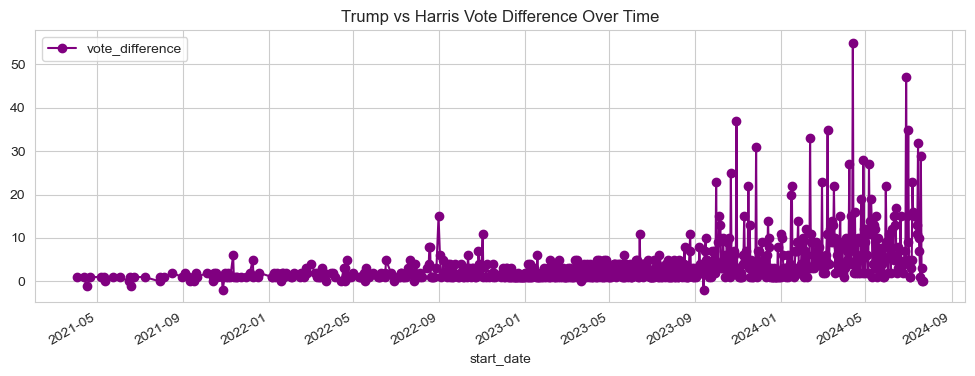

In [13]:
poll_df['start_date'] = pd.to_datetime(poll_df['start_date'], errors='coerce')
poll_df['answer'] = poll_df['answer'].str.lower()

group_cols = ['start_date']

vote_counts = poll_df.groupby(group_cols)['answer'].value_counts().unstack(fill_value=0)
vote_counts['vote_difference'] = vote_counts.get('trump', 0) - vote_counts.get('harris', 0)

poll_plot_df = vote_counts.reset_index()

fig = poll_plot_df.plot(
    x='start_date',
    y='vote_difference',
    figsize=(12, 4),
    marker='o',
    linestyle='-',
    color='purple',
    title='Trump vs Harris Vote Difference Over Time'
)

plt.show()

In [14]:
donor_df = pd.read_csv(
    r'C:\Users\DR.SAGNIK\.ipynb_checkpoints\donor_data.csv',
    dtype={'your_column_name': str}, 
    low_memory=False
)

print(donor_df.columns[26])

attachments


In [15]:
donor_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905573 entries, 0 to 905572
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   report_number        905573 non-null  int64  
 1   amends_report        93936 non-null   float64
 2   amended_by_report    93967 non-null   float64
 3   origin               905573 non-null  object 
 4   committee_id         905573 non-null  int64  
 5   filer_id             905573 non-null  object 
 6   election_year        905573 non-null  int64  
 7   type                 905573 non-null  object 
 8   filer_name           905573 non-null  object 
 9   office               524408 non-null  object 
 10  fund                 905573 non-null  int64  
 11  position             176187 non-null  object 
 12  party                568587 non-null  object 
 13  ballot_number        16289 non-null   object 
 14  for_or_against       32723 non-null   object 
 15  jurisdiction     

In [16]:
donor_df.head()

,report_number,amends_report,amended_by_report,origin,committee_id,filer_id,election_year,type,filer_name,office,...,jurisdiction_type,receipt_date,filing_method,report_from,report_through,url,report_data,metadata,version,attachments
0,1001290469,NaN,NaN,C5,35530,BOEICP 209,2014,Political Committee,The Boeing Company Political Action Committee,NaN,...,NaN,11-10-2014,Paper,07-01-2014,10/31/2014,NaN,NaN,NaN,NaN,NaN
1,1001289995,NaN,NaN,C5,35530,BOEICP 209,2014,Political Committee,The Boeing Company Political Action Committee,NaN,...,NaN,07-09-2014,Paper,06-01-2014,06/30/2014,NaN,NaN,NaN,NaN,NaN
2,1001289180,NaN,NaN,C5,35530,BOEICP 209,2014,Political Committee,The Boeing Company Political Action Committee,NaN,...,NaN,02-06-2014,Paper,01-01-2014,01/31/2014,NaN,NaN,NaN,NaN,NaN
3,110268205,NaN,NaN,C4,70,28THDR 467,2024,Political Committee,28th Legislative District Republican Committee...,NaN,...,NaN,01-10-2025,Electronic,12-01-2024,12/31/2024,https://apollo.pdc.wa.gov/public/registrations...,https://apollo.pdc.wa.gov/public/service/repor...,"{""sums"":{""receipts"":{""previous_receipts"":{""lin...",1.1,NaN
4,110263999,NaN,NaN,C4,70,28THDR 467,2024,Political Committee,28th Legislative District Republican Committee...,NaN,...,NaN,12-10-2024,Electronic,11-01-2024,11/30/2024,https://apollo.pdc.wa.gov/public/registrations...,https://apollo.pdc.wa.gov/public/service/repor...,"{""sums"":{""receipts"":{""previous_receipts"":{""lin...",1.1,NaN


In [17]:
donor_df['fund'].value_counts()

fund
23269    26
15360    25
70505    25
21530    24
47906    24
         ..
77019     1
46233     1
14654     1
10231     1
44762     1
Name: count, Length: 89997, dtype: int64

In [18]:
don_mean = donor_df['fund'].mean()

don_std = donor_df['fund'].std()

print('The average donation was %.2f with a std of %.2f' % (don_mean, don_std))

The average donation was 54979.31 with a std of 25987.12


In [19]:
top_donor = donor_df['fund'].copy()
top_donor = top_donor.sort_values()

print(top_donor)

540037    10000
46735     10000
40957     10000
436620    10000
789213    10000
          ...  
718634    99999
263176    99999
715992    99999
478428    99999
134263    99999
Name: fund, Length: 905573, dtype: int64


In [20]:
print(donor_df['fund'].sort_values(ascending=False).head(10))

109802    99999
134263    99999
718634    99999
113240    99999
263176    99999
478428    99999
715992    99999
761528    99998
687774    99998
6686      99998
Name: fund, dtype: int64


In [21]:
print(donor_df['fund'].dtype)

int64


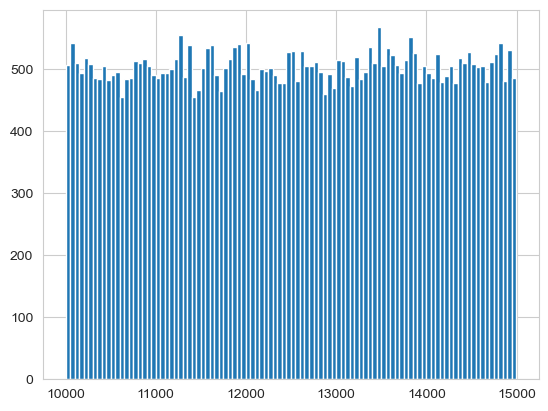

In [22]:
top_donor = donor_df['fund'].copy()
common_don = top_donor[top_donor < 15000]
common_don.hist(bins=100)
plt.show()

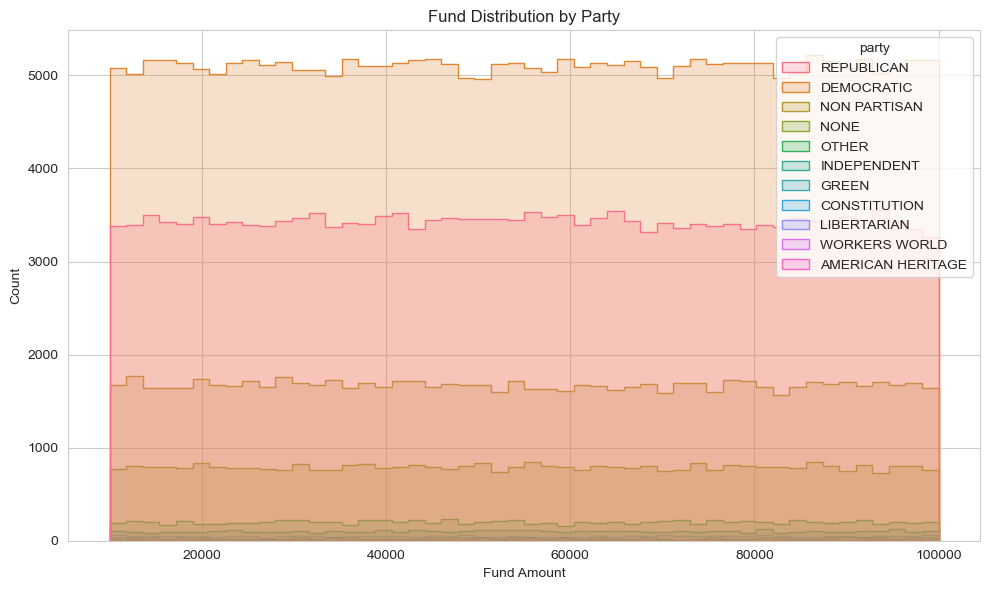

In [23]:
df_clean = donor_df.dropna(subset=['fund', 'party'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='fund', hue='party', bins=50, element='step', stat='count', common_norm=False)

plt.title('Fund Distribution by Party')
plt.xlabel('Fund Amount')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
filers = donor_df.filer_name.unique()

filers

array(['The Boeing Company Political Action Committee',
       '28th Legislative District Republican Committee (28THLDRC)',
       '46TH DISTRICT DEMOCRATS', ...,
       'Half Ass Republicans of Washington (HAROW)',
       ' KIMBERLY A Fischer (Kimberly Fischer)',
       'Benjamin Christly (Ben Christly)'], dtype=object)

In [32]:
donor_df.groupby('filer_name')['fund'].count()

filer_name
 COLLEEN M. McAleer (COLLEEN MCALEER)          64
 CRUVER AMY A  (Amy Cruver)                   111
 DUANE DALGLEISH (DUANE DALGLEISH)              7
 DUANE DALGLEISH (Duane Dalgleish)              2
 EDWARD M EGAN (Edward M. Egan)                 4
                                             ... 
quinton f mitchum (Tony Mitchum)                4
shirley maike (SHIRLEY MAIKE)                  15
shirley maike (Shirley Maike)                  21
william h broughton (William H. Broughton)    126
yes for yakima kids                             7
Name: fund, Length: 11769, dtype: int64

In [34]:
filer_fund = donor_df.groupby('filer_name')['fund'].sum()
print(filer_fund)

filer_name
 COLLEEN M. McAleer (COLLEEN MCALEER)         3487777
 CRUVER AMY A  (Amy Cruver)                   6319771
 DUANE DALGLEISH (DUANE DALGLEISH)             363076
 DUANE DALGLEISH (Duane Dalgleish)             100632
 EDWARD M EGAN (Edward M. Egan)                193474
                                               ...   
quinton f mitchum (Tony Mitchum)               308522
shirley maike (SHIRLEY MAIKE)                  666358
shirley maike (Shirley Maike)                 1049422
william h broughton (William H. Broughton)    7397298
yes for yakima kids                            360340
Name: fund, Length: 11769, dtype: int64


In [41]:
top_filers = filer_fund.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_filers.plot(kind='bar', color='skyblue')

plt.title('Top 20 Filers by Total Fund')
plt.xlabel('Filer Name')
plt.ylabel('Total Fund')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('top_filers.png')
plt.close()

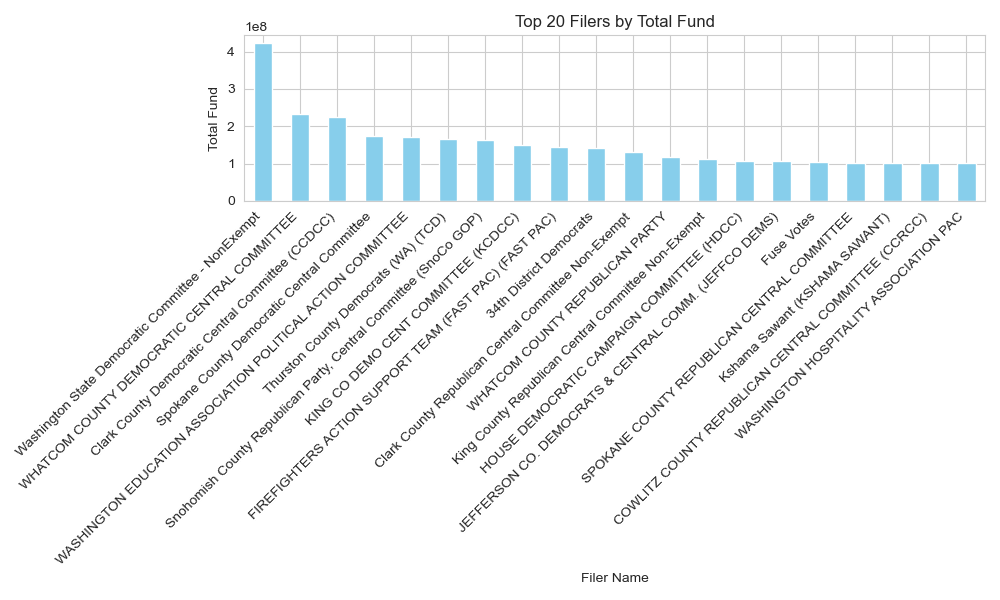

In [42]:
from IPython.display import Image
Image('top_filers.png')